# Random Forest 

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.



In [2]:
# Pandas is used for data manipulation
import pandas as pd
import os

# Read in data as a dataframe and display 5 rows
cwd = os.getcwd()
features = pd.read_csv(os.path.join(cwd,'FT_data_final.csv'))
features.head(5)


,member_id,loan_amnt,funded_amnt,term(years),int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,mean_recoveries,mean_annual_inc_joint,mean_dti_joint,mean_total_cur_bal,loan_count,mode_loan_subgrade,mode_home_ownership,mode_loan_purpose,mode_addr_state,mode_loan_status
0,80364,25000,25000,3,11.89,B,B4,6 months,RENT,85000.0,...,81.448141,0.0,0.0,101440.44640,76263,B3,MORTGAGE,debt_consolidation,CA,Fully Paid
1,114426,7000,7000,3,10.71,B,B5,6 months,RENT,65000.0,...,81.448141,0.0,0.0,101440.44640,76263,B3,MORTGAGE,debt_consolidation,CA,Fully Paid
2,137225,25000,25000,3,16.99,D,D3,1 year,RENT,70000.0,...,232.546682,0.0,0.0,96792.47854,40818,D1,RENT,debt_consolidation,CA,Fully Paid
3,138150,1200,1200,3,13.11,C,C2,11 years,OWN,54000.0,...,148.351531,0.0,0.0,102643.85230,65680,C1,MORTGAGE,debt_consolidation,CA,Fully Paid
4,139635,10800,10800,3,13.57,C,C3,6 years,RENT,32000.0,...,148.351531,0.0,0.0,102643.85230,65680,C1,MORTGAGE,debt_consolidation,CA,Fully Paid


In [3]:
features_later = features

features_later.head(5)

interest_rate = features_later['int_rate'].loc[:500]


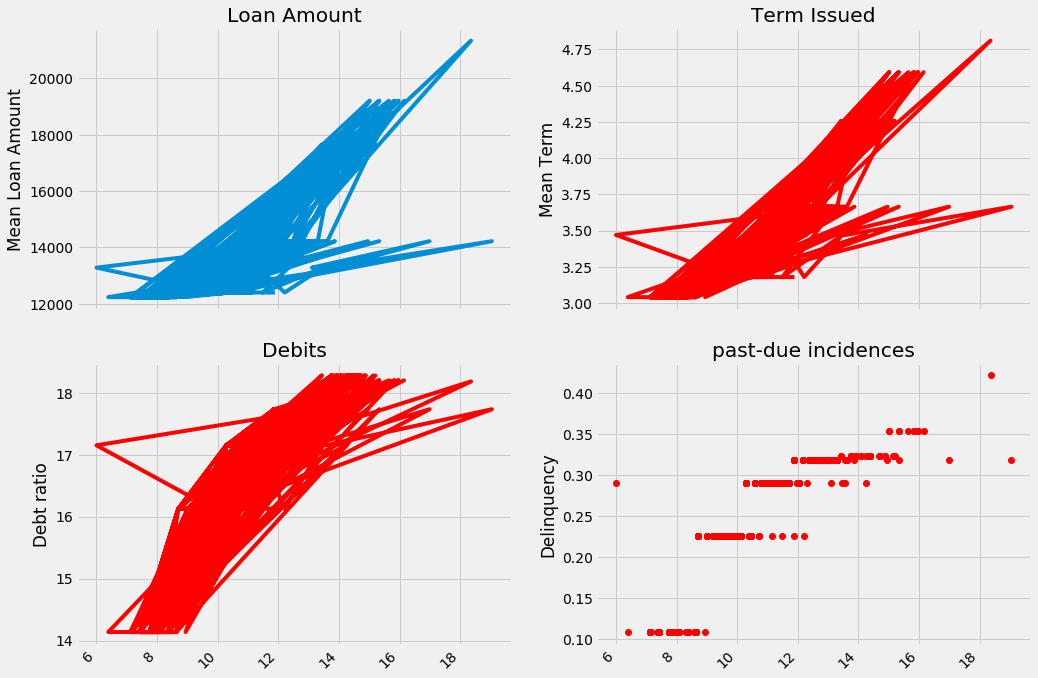

In [4]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Historical Average Max Temp
ax1.plot(interest_rate, features['mean_loan_amt'].loc[:500])
ax1.set_xlabel(''); ax1.set_ylabel('Mean Loan Amount'); ax1.set_title('Loan Amount')

# Prior Avg Wind Speed 
ax2.plot(interest_rate, features['mean_term'].loc[:500], 'r-')
ax2.set_xlabel(''); ax2.set_ylabel('Mean Term'); ax2.set_title('Term Issued')

# Prior Precipitation
ax3.plot(interest_rate, features['mean_dti'].loc[:500], 'r-')
ax3.set_xlabel(''); ax3.set_ylabel('Debt ratio'); ax3.set_title('Debits')

# Prior Snowdepth
ax4.plot(interest_rate, features['mean_delinq_2yrs'].loc[:500], 'ro')
ax4.set_xlabel(''); ax4.set_ylabel('Delinquency'); ax4.set_title('past-due incidences')

plt.tight_layout(pad=2)

In [5]:
# One Hot Encoding
features = pd.get_dummies(features)

# Extract features and labels
labels = features['int_rate']
features = features.drop('int_rate', axis = 1)
# print(features.columns)
# List of features for later use
feature_list = list(features.columns)

# Convert to numpy arrays
import numpy as np

features = np.array(features)
labels = np.array(labels)

# Training and Testing sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


In [6]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (190642, 954)
Training Labels Shape: (190642,)
Testing Features Shape: (63548, 954)
Testing Labels Shape: (63548,)


# Considered the features to establish a baseline

In [65]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Random forest with only the most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the most important features
important_indices = [feature_list.index('loan_amnt'), 
                     feature_list.index('funded_amnt'), 
                     feature_list.index('term(years)'),
                     feature_list.index('annual_inc'), 
                     feature_list.index('dti'), 
                     feature_list.index('delinq_2yrs'), 
                     feature_list.index('mths_since_last_delinq'), 
                     feature_list.index('open_acc'), 
                     feature_list.index('pub_rec'), 
                     feature_list.index('revol_bal'), 
                     feature_list.index('total_pymnt'), 
                     feature_list.index('total_rec_int'), 
                     feature_list.index('total_rec_late_fee'), 
                     feature_list.index('recoveries'), 
                     feature_list.index('dti_joint'), 
                     feature_list.index('tot_cur_bal')]

train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
print('MAPE value is:', mape)
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 2.03 degrees.
MAPE value is: 16.593343763901153
Accuracy: 83.41 %.


In [66]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions)) 
print('Mean Absolute Percentage Error value is:', mape)
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))  
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.034600667684265
Mean Absolute Percentage Error value is: 16.593343763901153
Mean Squared Error: 7.673824004753209
Root Mean Squared Error: 2.7701667828405583
Accuracy: 83.41 %.


# Calculating with the mean values of the important indices

The mean values of the important indices are considered here

In [7]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Random forest with only the most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the most important features
important_indices = [feature_list.index('mean_loan_amt'), 
                     feature_list.index('mean_funded_amnt'), 
                     feature_list.index('mean_term'),
                     feature_list.index('mean_annual_inc'), 
                     feature_list.index('mean_dti'), 
                     feature_list.index('mean_delinq_2yrs'), 
                     feature_list.index('mean_mths_since_last_delinq'), 
                     feature_list.index('mean_open_cc'), 
                     feature_list.index('mean_pub_rec'), 
                     feature_list.index('mean_revol_bal'), 
                     feature_list.index('mean_total_paymnt'), 
                     feature_list.index('mean_rec_int'), 
                     feature_list.index('mean_total_rec_late_fee'), 
                     feature_list.index('mean_recoveries'), 
                     feature_list.index('mean_dti_joint'), 
                     feature_list.index('mean_annual_inc_joint'), 
                     feature_list.index('mean_total_cur_bal')]

train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
print('MAPE value is:', mape)
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 1.06 degrees.
MAPE value is: 8.434945851378119
Accuracy: 91.57 %.


In [8]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions))  
print('Mean Absolute Percentage Error value is:', mape)
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions))) 
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.058281080947692
Mean Absolute Percentage Error value is: 8.434945851378119
Mean Squared Error: 1.7447602861359497
Root Mean Squared Error: 1.3208937452103973
Accuracy: 91.57 %.


# Feature Reduction
From previous experience and the graphs produced at the beginning, we know that some features are not useful for our temperature prediction problem. To reduce the number of features, which will reduce runtime, hopefully without significantly reducing performance, we can examine the feature importances from the random forest.

# Feature Importances

In [9]:
# Get numerical feature importances
importances = list(rf_most_important.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: delinq_2yrs          Importance: 0.17
Variable: member_id            Importance: 0.09
Variable: loan_amnt            Importance: 0.09
Variable: dti                  Importance: 0.09
Variable: revol_bal            Importance: 0.09
Variable: annual_inc           Importance: 0.08
Variable: total_pymnt          Importance: 0.08
Variable: total_rec_int        Importance: 0.08
Variable: total_rec_late_fee   Importance: 0.08
Variable: funded_amnt          Importance: 0.07
Variable: open_acc             Importance: 0.07
Variable: mths_since_last_delinq Importance: 0.01
Variable: term(years)          Importance: 0.0
Variable: pub_rec              Importance: 0.0
Variable: recoveries           Importance: 0.0
Variable: annual_inc_joint     Importance: 0.0
Variable: dti_joint            Importance: 0.0


# Visualize Feature Importances

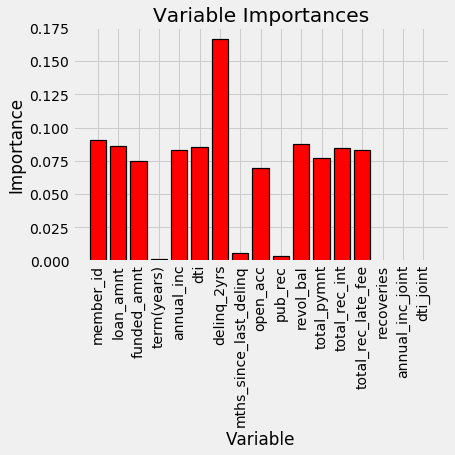

In [10]:
# Reset style 
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

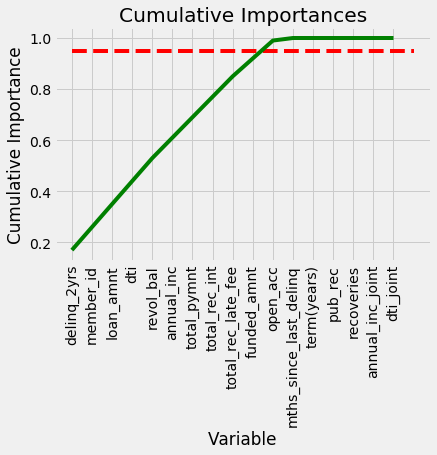

In [11]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

# Limit Number of Features
We will now reduce the number of features in use by the model to only those required to account for 95% of the importance. The same number of features must be used in the training and testing sets.

In [12]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 11


In [13]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:11]]

# print(important_feature_names)
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (190642, 11)
Important test features shape: (63548, 11)


In [14]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Random forest with only the most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the most important features
important_indices = [feature_list.index('mean_loan_amt'), 
                     feature_list.index('mean_funded_amnt'), 
                     feature_list.index('mean_term'),
                     feature_list.index('mean_annual_inc'), 
                     feature_list.index('mean_delinq_2yrs'), 
                     feature_list.index('mean_mths_since_last_delinq'), 
                     feature_list.index('mean_pub_rec'), 
                     feature_list.index('mean_revol_bal'), 
                     feature_list.index('mean_total_paymnt'), 
                     feature_list.index('mean_dti_joint'), 
                     feature_list.index('mean_annual_inc_joint'), 
                     feature_list.index('mean_total_cur_bal')]

train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
print('MAPE value is:', mape)
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 1.06 degrees.
MAPE value is: 8.434945851378117
Accuracy: 91.57 %.


In [15]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions))  
print('Mean Absolute Percentage Error value is:', mape)
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions))) 
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.0582810809476917
Mean Absolute Percentage Error value is: 8.434945851378117
Mean Squared Error: 1.7447602861359501
Root Mean Squared Error: 1.3208937452103973
Accuracy: 91.57 %.


# Visualization

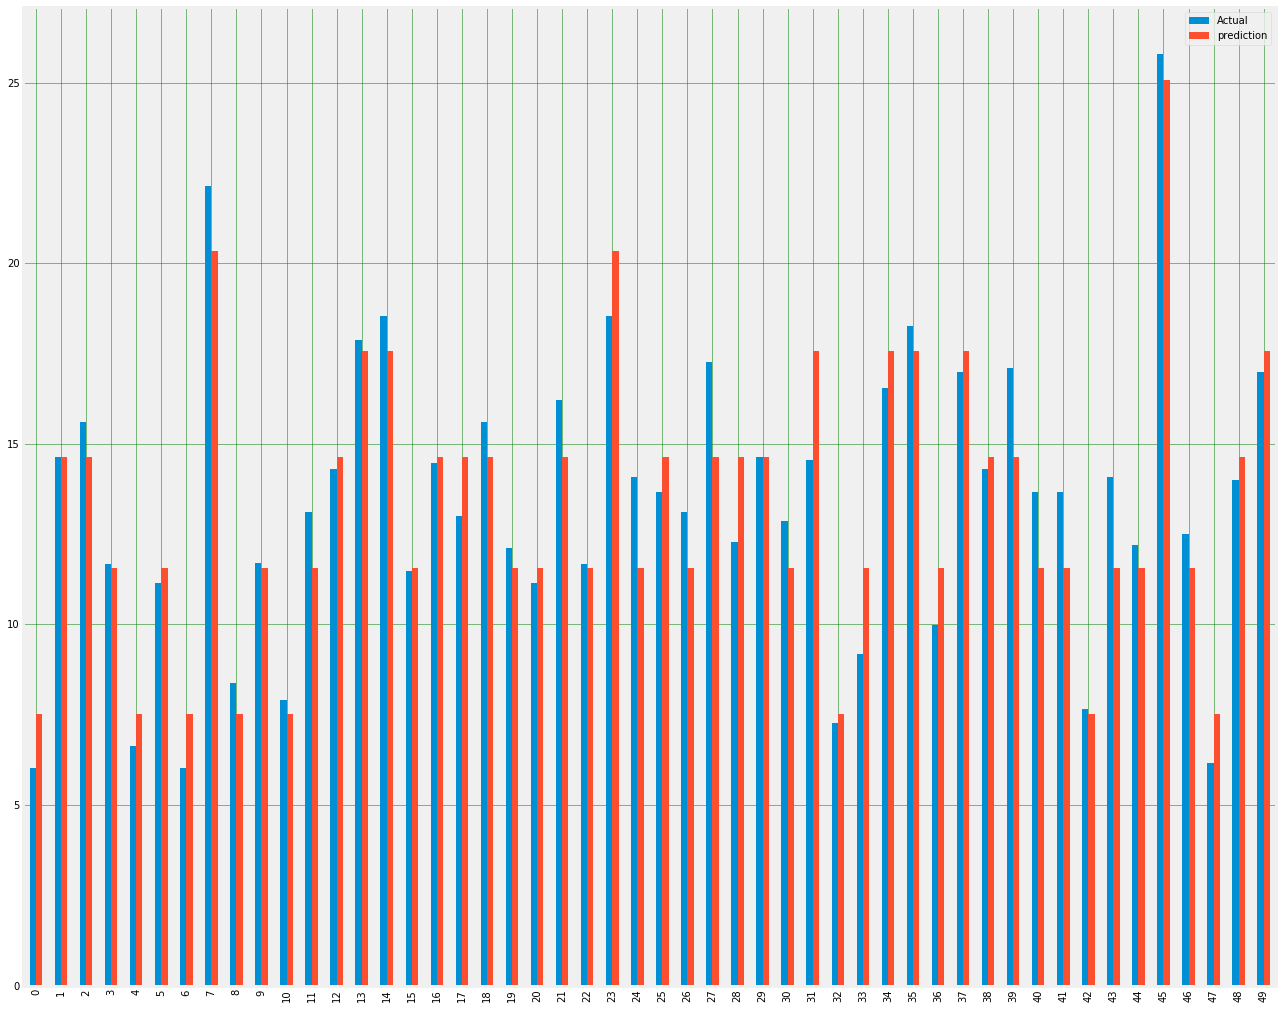

In [26]:
# Dataframe with predictions and actual
predictions_data = pd.DataFrame(data = {'Actual': test_labels, 'prediction': predictions})

#print the values
prd = predictions_data.head(50)

#plot the values for comparison
prd.plot(kind='bar',figsize=(20,18))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



# Random Search with cross validation and Hyperparameterization

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(train_important, train_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [200, 222, 244, 266, 288, 311, 333, 355, 377, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 12, 14, 16, 18, 21, 23, 25, 27, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=2)

In [31]:
# Make predictions and determine the error
predictions = rf_random.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
print('MAPE value is:', mape)
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 1.06 degrees.
MAPE value is: 8.434968237458582
Accuracy: 91.57 %.


In [32]:
rf_random.best_params_

{'n_estimators': 377,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

# Evaluate Random Search

In [33]:
def evaluate(model, test_important, test_labels):
    predictions = model.predict(test_important)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_important, train_labels)
print('Base Model')
base_accuracy = evaluate(base_model, test_important, test_labels)

best_random = rf_random.best_estimator_
print('Best Random Model')
random_accuracy = evaluate(best_random, test_important, test_labels)

Base Model
Model Performance
Average Error: 1.0583 degrees.
Accuracy = 91.57%.
Best Random Model
Model Performance
Average Error: 1.0583 degrees.
Accuracy = 91.57%.


# Grid Search with Cross Validation

In [34]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [23]:
# Fit the grid search to the data
grid_search.fit(train_important, train_labels)
grid_search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 17.4min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [27]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_important, test_labels)

Model Performance
Average Error: 1.0583 degrees.
Accuracy = 91.56%.


In [28]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.00%.


# Another Round of Grid Search

In [29]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [15, 20, None],
    'max_features': [3, 4],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [10],
    'n_estimators': [75, 100, 125]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search_ad = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 5, 
                           n_jobs = -1, verbose = 2)

grid_search_ad.fit(train_important, train_labels)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  7.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [15, 20, None], 'max_features': [3, 4], 'min_samples_leaf': [5, 6, 7], 'min_samples_split': [10], 'n_estimators': [75, 100, 125]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=2)

In [30]:
grid_search_ad.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [32]:
best_grid_ad = grid_search_ad.best_estimator_
evaluate(best_grid_ad, test_important, test_labels)

Model Performance
Average Error: 1.0583 degrees.
Accuracy = 91.57%.


91.56544947274156

# Final Model

In [33]:
print('Model Parameters:\n')
pprint(best_grid.get_params())
print('\n')
evaluate(best_grid, test_important, test_labels)

Model Parameters:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 2,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Model Performance
Average Error: 1.0583 degrees.
Accuracy = 91.56%.


91.5648935237907